In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import cv2

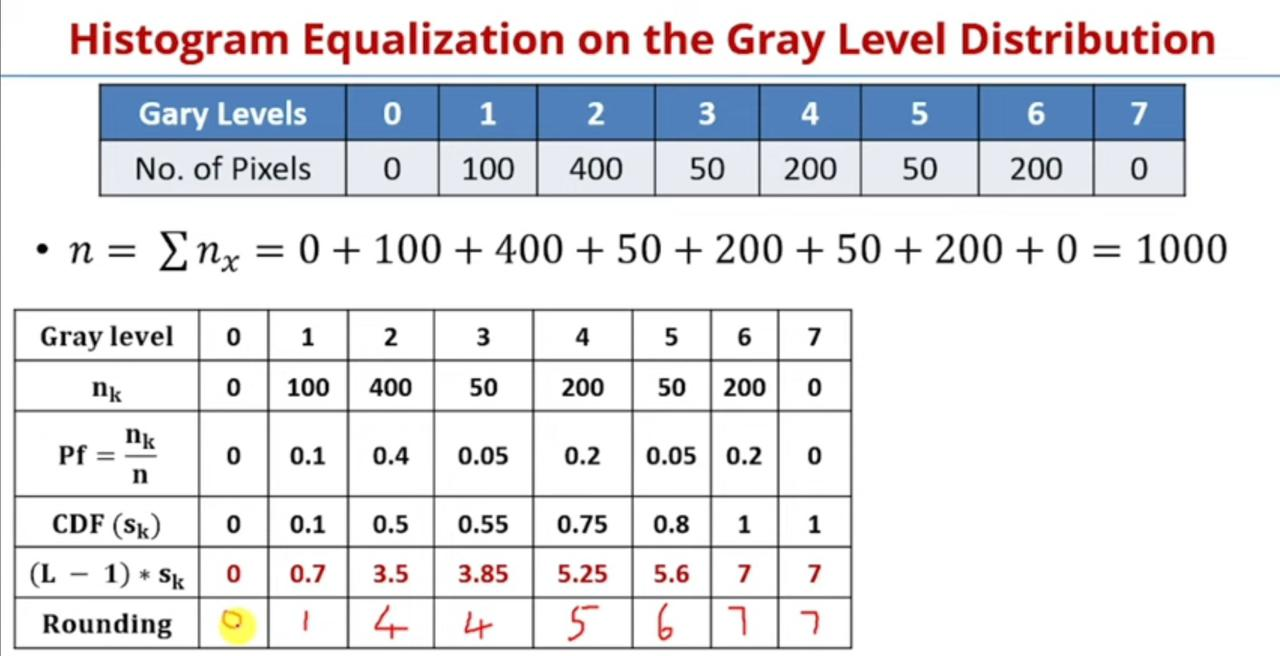

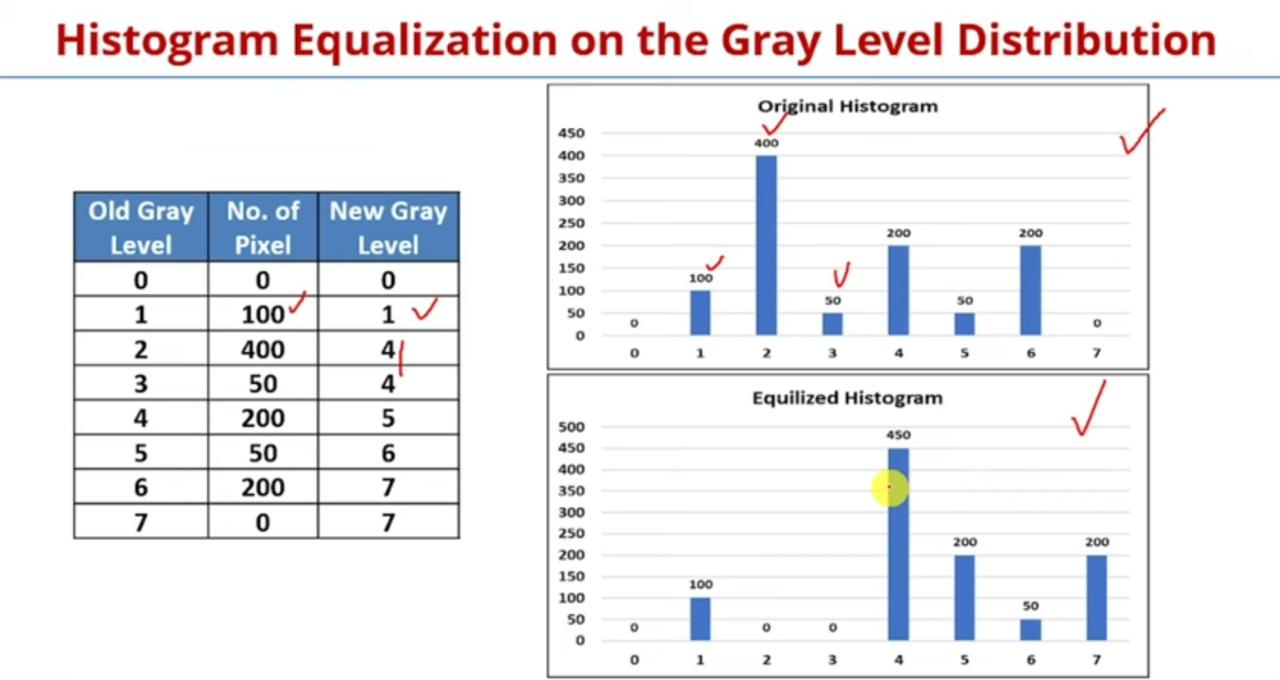

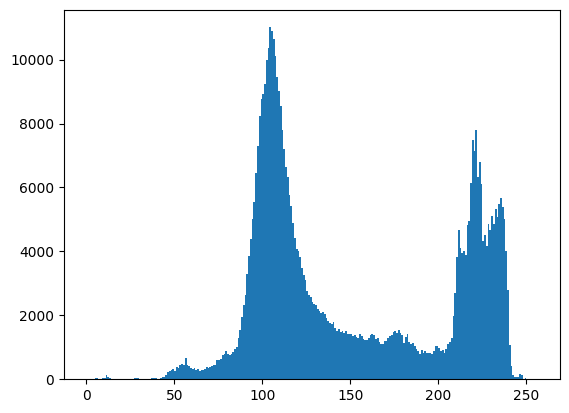

In [3]:
import matplotlib.pyplot as plt
# Load the image from the drive
image_path = '/content/car.png'
image = cv2.imread(image_path)

# Plot the histogram of the image
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

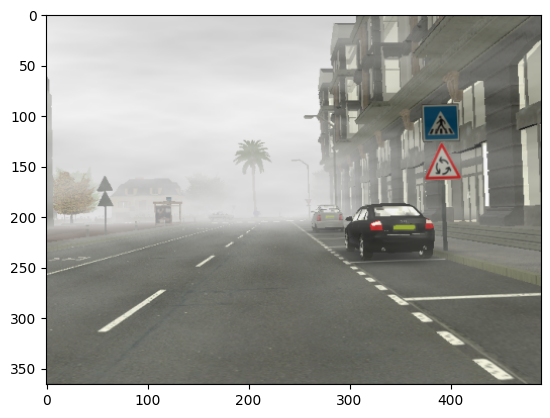

In [4]:
plt.imshow(image)
plt.show()

In [5]:
hist,bins = np.histogram(image.flatten(),256,[0,256])

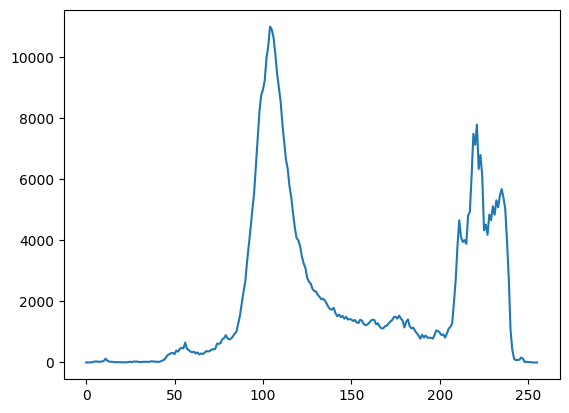

In [6]:
plt.plot(hist)
plt.show()

In [7]:
print(hist.cumsum())

[     0      0      0      7     25     57     90    111    135    168
    220    347    405    434    456    479    489    501    511    521
    525    529    532    539    556    577    590    624    650    677
    695    708    730    751    772    796    820    862    892    922
    944    962    997   1056   1142   1290   1526   1795   2100   2414
   2687   3080   3435   3882   4364   4825   5475   5930   6334   6693
   7026   7380   7675   8003   8267   8563   8842   9162   9537   9896
  10275  10703  11134  11578  12194  12803  13437  14201  15000  15893
  16683  17438  18220  19075  20016  21028  22305  23846  25780  28100
  30750  34054  37895  42294  47302  52860  59305  66596  74817  83571
  92509 101751 111728 122095 133106 144016 154655 164761 174223 183226
 191771 199576 206791 213441 219779 225554 230969 235863 240289 244366
 248368 252181 255656 258905 262006 264781 267429 270014 272427 274771
 277095 279308 281458 283531 285621 287653 289585 291402 293151 294885
 29667

In [8]:
in_arr = np.array([3, 4, 5, 2, 8])
print(in_arr.cumsum())

[ 3  7 12 14 22]


In [9]:
gfg = np.ma.masked_equal([1, 2, 3, 4,3], 2)

print(gfg)
print(np.ma.filled(gfg, 0))

[1 -- 3 4 3]
[1 0 3 4 3]


In [10]:
def eq_hist(hist):
    # We calculate the distributed function
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m -cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    return cdf

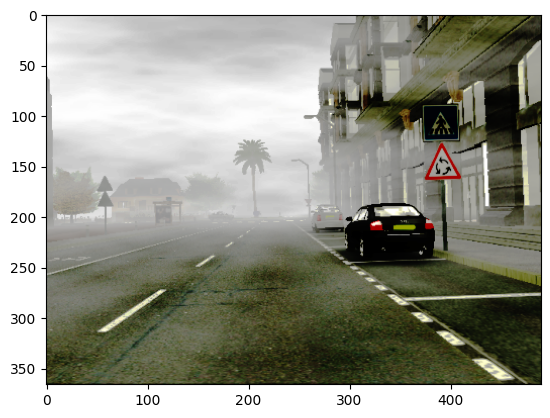

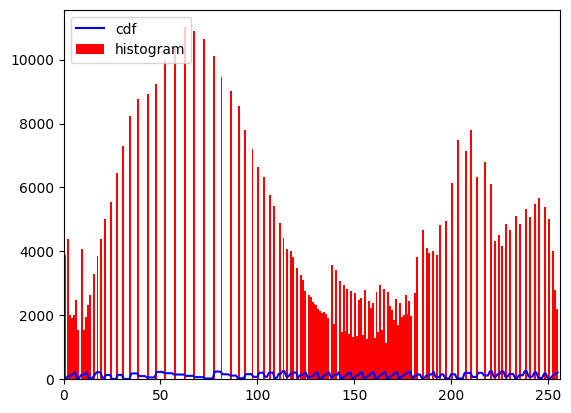

In [11]:
cdf = eq_hist(hist)
img2 = cdf[image]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = eq_hist(hist2)
img3 = cdf2[img2]
cdf_normalized = cdf2 * hist2.max()/ cdf2.max()

plt.figure()
plt.imshow(img3)

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()